<a href="https://colab.research.google.com/github/ajb2375/GDPR-final-/blob/main/final_project_barr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Media Topic Modeling on GDPR, May 2018 - November 2025**

### **1. Introduction**

The European Union (EU) adopted the General Data Protection Regulation (GDPR) in 2016 with the goal of strengthening individual rights to data privacy. Since it became fully enforceable across the EU on May 25, 2018, it has significantly reshaped data protection law across Europe and beyond.

On November 19, 2025, the European Commission proposed a Digital Omnibus package proposal aiming to implement key amendments to GDPR. Firstly, the proposal aims to restrict the scope of “personal data”, lifting protections on some data that currently falls under GDPR safeguards. Secondly, the proposal would clarify rules for the processing of personal data in the development and deployment of AI systems. Thirdly, the package would expand the refusal rights of organizations when responding to data subject access requests (DSARs). Under the current GDPR framework, individuals can submit DSARs for any reason if they wish to see what personal data a company holds about them. The proposed amendment would restrict submissions only to cases in which an individual can prove their request is tied to the protection of their data. Fourthly, the proposal aims to raise the threshold for notifying data protection authorities in the event of a data breach and extend notification deadlines from 72 to 96 hours. If negotiations proceed smoothly, adoption is expected to take place in mid-2027. Though it is important to note that this is not an exhaustive description of the proposed amendments, it demonstrates that the Digital Omnibus package would radically change GDPR as we know it today.

Given the contrasting perspectives and upcoming negotiations on this policy, it is important to examine recent media coverage of GDPR.



**1.1 Questions and Methods**

How has media coverage of the GDPR changed from its implementation in May 2018 to the present day, and how do coverage trends vary across time periods?

This project analyzes news coverage to track changes in the most frequent words used in headlines of articles about GDPR. By analyzing headlines and text from major news outlets relating to key moments in GDPR history (implementation in May 2018, a 746 million euro fine imposed on Amazon announced at the end of July 2021, and the new Digital Omnibus package proposal in November 2025), we hope to see how media perceptions have evolved and how public-facing narratives around GDPR have changed. We can also explore how media coverage aligns with broader policy debates.



### **2. Data Collection and Cleaning**

To begin, I'll pull news articles from GDELT. This code was written with help from ChatGPT and Gemini.

In [1]:
## install and imports
!pip install requests pandas beautifulsoup4 lxml python-dotenv

import requests            # for HTTP requests to APIs / web pages
import json                # for pretty-printing JSON
import pandas as pd        # for DataFrame work
from bs4 import BeautifulSoup  # for HTML parsing
import time                # for polite sleeping / rate-limiting
import os                  # for reading environment variables


In [2]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import json # Import json for potential error logging

# Function to get GDELT articles
def fetch_gdelt_articles(keyword, start_date, end_date, max_records=250):
    url = (
        "https://api.gdeltproject.org/api/v2/doc/doc"
        "?query={keyword}"
        "&mode=ArtList"
        "&maxrecords={max_records}"
        "&format=json"
        "&startdatetime={start}"
        "&enddatetime={end}"
    ).format(
        keyword=keyword,
        max_records=max_records,
        start=start_date.strftime("%Y%m%d%H%M%S"),
        end=end_date.strftime("%Y%m%d%H%M%S")
    )

    r = requests.get(url)

    if r.status_code != 200:
        print(f"Error: Received status code {r.status_code} for URL: {url}")
        print(f"Response text (start): {r.text[:500]}...") # Print first 500 chars of response for debugging
        return pd.DataFrame()

    try:
        data = r.json()
    except json.JSONDecodeError as e:
        print(f"JSONDecodeError: Could not decode JSON from GDELT response for URL: {url}")
        print(f"Response text (start): {r.text[:500]}...") # Print response text for debugging
        print(f"Error details: {e}")
        return pd.DataFrame()

    if "articles" not in data:
        print(f"Warning: 'articles' key not found in GDELT response for URL: {url}")
        print(f"Response data: {data}") # Print the full data for inspection
        return pd.DataFrame()

    return pd.DataFrame(data["articles"])

# Iterate monthly from May 2018 → present
all_data = []

# Fix: Join keywords with 'OR' to make it a valid GDELT query string
keyword = "GDPR"
start = datetime(2018, 5, 1)
today = datetime.today()

current = start

while current <= today:
    next_month = current + timedelta(days=31)
    next_month = next_month.replace(day=1)

    print(f"Fetching: {current.strftime('%Y-%m-%d')} → {next_month.strftime('%Y-%m-%d')}")

    df = fetch_gdelt_articles(keyword, current, next_month)
    if not df.empty:
        all_data.append(df)

    current = next_month


# Combine and save
if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df.to_csv("gdpr_news_gdelt_2018_2025.csv", index=False)
    print("Saved: gdpr_news_gdelt_2018_2025.csv")
else:
    print("No data found.")

Fetching: 2018-05-01 → 2018-06-01
Fetching: 2018-06-01 → 2018-07-01
Fetching: 2018-07-01 → 2018-08-01
Fetching: 2018-08-01 → 2018-09-01
Fetching: 2018-09-01 → 2018-10-01
Fetching: 2018-10-01 → 2018-11-01
Fetching: 2018-11-01 → 2018-12-01
Fetching: 2018-12-01 → 2019-01-01
Fetching: 2019-01-01 → 2019-02-01
Fetching: 2019-02-01 → 2019-03-01
Fetching: 2019-03-01 → 2019-04-01
Fetching: 2019-04-01 → 2019-05-01
Fetching: 2019-05-01 → 2019-06-01
Fetching: 2019-06-01 → 2019-07-01
Fetching: 2019-07-01 → 2019-08-01
Fetching: 2019-08-01 → 2019-09-01
Fetching: 2019-09-01 → 2019-10-01
Fetching: 2019-10-01 → 2019-11-01
Fetching: 2019-11-01 → 2019-12-01
Fetching: 2019-12-01 → 2020-01-01
Fetching: 2020-01-01 → 2020-02-01
Fetching: 2020-02-01 → 2020-03-01
Fetching: 2020-03-01 → 2020-04-01
Fetching: 2020-04-01 → 2020-05-01
Fetching: 2020-05-01 → 2020-06-01
Fetching: 2020-06-01 → 2020-07-01
Fetching: 2020-07-01 → 2020-08-01
Fetching: 2020-08-01 → 2020-09-01
Fetching: 2020-09-01 → 2020-10-01
Fetching: 2020

In [3]:
df = pd.read_csv("gdpr_news_gdelt_2018_2025.csv")
## cleaning
# Drop unwanted columns
df = df.drop(columns=["url_mobile", "socialimage"])

# Convert seendate from GDELT format to datetime
df["seendate"] = pd.to_datetime(
    df["seendate"],
    format="%Y%m%dT%H%M%SZ",
    errors="coerce"   # turn bad formats into NaT
)

# Drop any rows with nulls remaining after conversion
df = df.dropna()

# Drop duplicate rows
df = df.drop_duplicates()

# save cleaned csv
df.to_csv("gdpr_news_gdelt_cleaned.csv", index=False)

print("Cleaning complete. New shape:", df.shape)
print(df.head())

Cleaning complete. New shape: (21934, 6)
                                                 url  \
0  http://www.4-traders.com/MICROSOFT-CORPORATION...   
1  http://www.4-traders.com/news/Two-Day-General-...   
2  https://www.natlawreview.com/article/gdpr-beco...   
3  https://www.jdsupra.com/legalnews/the-gdpr-bec...   
4  https://www.jdsupra.com/legalnews/retailers-co...   

                                               title            seendate  \
0  The final compliance countdown : Are you ready... 2018-05-11 18:15:00   
1  Two Day General Data Protection Regulation ( G... 2018-05-01 17:15:00   
2                                GDPR Is Almost Here 2018-05-04 01:30:00   
3  The GDPR Becomes Effective This Month : Are Yo... 2018-05-04 20:30:00   
4  Retailers , Consent and the GDPR : Is Your Bus... 2018-05-10 17:45:00   

             domain language  sourcecountry  
0     4-traders.com  English  United States  
1     4-traders.com  English  United States  
2  natlawreview.com  Englis

First, I'll create three separate csvs for the relevant time periods.

In [4]:
# Load the cleaned CSV, parse by date
df = pd.read_csv("gdpr_news_gdelt_cleaned.csv", parse_dates=["seendate"])

# Filter by months
df_may_2018 = df[(df["seendate"].dt.year == 2018) & (df["seendate"].dt.month == 5)]
df_august_2021 = df[(df["seendate"].dt.year == 2021) & (df["seendate"].dt.month == 8)]
df_nov_2025 = df[(df["seendate"].dt.year == 2025) & (df["seendate"].dt.month == 11)]

# Save filtered subsets BEFORE scraping
df_may_2018.to_csv("gdpr_may_2018_urls.csv", index=False)
df_august_2021.to_csv("gdpr_august_2021_urls.csv", index=False)
df_nov_2025.to_csv("gdpr_nov_2025_urls.csv", index=False)

print(len(df_may_2018), len(df_august_2021), len(df_nov_2025))

241 240 232


Next, I'll scrape each subset using requests and beautifulsoup. This code was written with help from ChatGPT. It takes some time to run.

In [5]:
### general script
import requests
import time
# mimic real browsers so websites don't block
headers = {
    "User-Agent":
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
    "AppleWebKit/537.36 (KHTML, like Gecko) "
    "Chrome/120.0.0.0 Safari/537.36"
}

# scraping first paragraphs
def get_first_paragraph(url):
    try: #send request, ignore if it doesn't work
        res = requests.get(url, headers=headers, timeout=10)
        if res.status_code != 200:
            return None
        # parse html
        soup = BeautifulSoup(res.text, "html.parser")
        paragraphs = soup.find_all("p")

        for p in paragraphs:
            text = p.get_text(strip=True)
            # filter out short boilerplate
            if text and len(text) > 40:
                return text

    except Exception:
        return None

    return None

# scrape first paragraph and save new csv with new column called first paragraph
def scrape_subset(input_csv, output_csv):
    df = pd.read_csv(input_csv)

    first_paragraphs = []
    for url in df["url"]:
        para = get_first_paragraph(url)
        first_paragraphs.append(para)
        time.sleep(0.5)  # politeness delay

    df["first_paragraph"] = first_paragraphs
    df.to_csv(output_csv, index=False)
    print(f"Saved scraped file → {output_csv}")

In [6]:
scrape_subset("gdpr_may_2018_urls.csv",  "gdpr_may_2018_scraped.csv")
scrape_subset("gdpr_august_2021_urls.csv", "gdpr_august_2021_scraped.csv")
scrape_subset("gdpr_nov_2025_urls.csv",  "gdpr_nov_2025_scraped.csv")


Saved scraped file → gdpr_may_2018_scraped.csv
Saved scraped file → gdpr_august_2021_scraped.csv
Saved scraped file → gdpr_nov_2025_scraped.csv


I'll clean out failed scrapes, missed duplicates from before, and any missed short boilerplate entries.

In [7]:
def clean_scraped(file):
    df = pd.read_csv(file)
    df["first_paragraph"] = df["first_paragraph"].replace(["", "None", "none"], pd.NA)
    df["first_paragraph"] = df["first_paragraph"].apply(
        lambda x: x if isinstance(x, str) and len(x.split()) >= 10 else None
    )
    df = df.dropna(subset=["first_paragraph"]) ## again for substantial paragraphs only, no empty entires
    df = df.drop_duplicates() ## no duplicates
    df = df[df["first_paragraph"].str.len() > 40] ## for substantial paragraphs only
    df.to_csv(file.replace(".csv", "_cleaned.csv"), index=False)
    print("Cleaned →", file.replace(".csv", "_cleaned.csv"))

clean_scraped("gdpr_may_2018_scraped.csv")
clean_scraped("gdpr_august_2021_scraped.csv")
clean_scraped("gdpr_nov_2025_scraped.csv")


Cleaned → gdpr_may_2018_scraped_cleaned.csv
Cleaned → gdpr_august_2021_scraped_cleaned.csv
Cleaned → gdpr_nov_2025_scraped_cleaned.csv


In [8]:
df_may_2018 = pd.read_csv("gdpr_may_2018_scraped_cleaned.csv")
df_august_2021 = pd.read_csv("gdpr_august_2021_scraped_cleaned.csv")
df_nov_2025  = pd.read_csv("gdpr_nov_2025_scraped_cleaned.csv")

In [9]:
## check one of the df to see if everything is working
df_may_2018.head(10)
df_august_2021.head(10)
df_nov_2025.head(10)

,url,title,seendate,domain,language,sourcecountry,first_paragraph
0,https://www.livelaw.in/job-updates/associate-d...,"Associate Director ( Client Contracting ), Del...",2025-11-01 13:00:00,livelaw.in,English,India,Deloitte Shared Services India LLP invites onl...
1,https://www.livelaw.in/job-updates/assistant-m...,"Assistant Manager ( Legal ), Deloitte Shared S...",2025-11-01 13:00:00,livelaw.in,English,India,Deloitte Shared Services India LLP invites onl...
2,https://www.computerworld.com/article/4087347/...,European Commission moves to loosen GDPR for A...,2025-11-10 13:00:00,computerworld.com,English,United States,The European Commission is preparing sweeping ...
3,https://www.csoonline.com/article/4087355/euro...,European Commission moves to loosen GDPR for A...,2025-11-10 12:45:00,csoonline.com,English,United States,The European Commission is preparing sweeping ...
4,https://www.mondaq.com:443/unitedstates/privac...,EDPB And European Commission Issue Joint Guide...,2025-11-12 05:45:00,mondaq.com,English,United States,"On October 9, 2025, the European Data Protecti..."
5,https://www.jdsupra.com/legalnews/gceu-awards-...,"GCEU Awards €50 , 000 in Non ‑ Material Damage...",2025-11-03 22:15:00,jdsupra.com,English,United States,"On 1 October 2025, the General Court of the Eu..."
6,https://www.jdsupra.com/legalnews/edpb-and-eur...,EDPB and European Commission Issue Joint Guide...,2025-11-10 23:45:00,jdsupra.com,English,United States,"On October 9, 2025, the European Data Protecti..."
7,https://www.theguardian.com/commentisfree/2025...,The EU has let US tech giants run riot . Dilut...,2025-11-12 06:00:00,theguardian.com,English,United Kingdom,The GDPR is Europe’s defence against digital o...
8,https://www.thehindu.com/sci-tech/technology/h...,How the EU Commission intends to modify data p...,2025-11-20 05:00:00,thehindu.com,English,India,The View From IndiaLooking at World Affairs fr...
9,https://www.jdsupra.com/legalnews/legal-ground...,Legal Grounds for Challenging the Overreach of...,2025-11-06 06:15:00,jdsupra.com,English,United States,As European data and artificial intelligence (...


The dataframe for May 2018 contains 240 rows, the dataframe for August 2021 contains 141 rows, and the dataframe for November 2025 contains 232 rows.

## **3. Topic Modeling with LDA**

**3.1 Headlines**

To gain deeper insights into media coverage surrounding the GDPR following these three key events, I will conduct topic modeling of headlines and first paragraphs with LDA. This will allow us to see the most frequent topics mentioned during each time period. This code was written with help Rebecca Krisel's [FreqDist → TF–IDF → Topic Modeling (U.S. Inaugural Addresses)](https://github.com/rskrisel/tfidf_topic_modeling/blob/main/Intro_Text_Analysis_TFIDF_LDA_Inaugurals.ipynb).
I will begin with just headlines.

In [10]:
## install and import
import re
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA, LatentDirichletAllocation

# Show full text in each cell (no truncation)
pd.set_option('display.max_colwidth', None)

# Display all rows and columns (adjust numbers as needed)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Expand the display width so wide tables don't wrap
pd.set_option('display.width', 0)

In [13]:
## simple preprocessing for titles
import nltk # Add this line to import the nltk library
nltk.download("punkt")
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return tokens

df_may_2018["tokens"]  = df_may_2018["title"].fillna("").apply(clean_and_tokenize)
df_august_2021["tokens"] = df_august_2021["title"].fillna("").apply(clean_and_tokenize)
df_nov_2025["tokens"]  = df_nov_2025["title"].fillna("").apply(clean_and_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
## create token lists for each timeframe
tokens_2018 = [t for toks in df_may_2018["tokens"] for t in toks]
tokens_2021 = [t for toks in df_august_2021["tokens"] for t in toks]
tokens_2025 = [t for toks in df_nov_2025["tokens"] for t in toks]

In [15]:
## run Freqdist
fdist_2018 = FreqDist(tokens_2018)
fdist_2021 = FreqDist(tokens_2021)
fdist_2025 = FreqDist(tokens_2025)

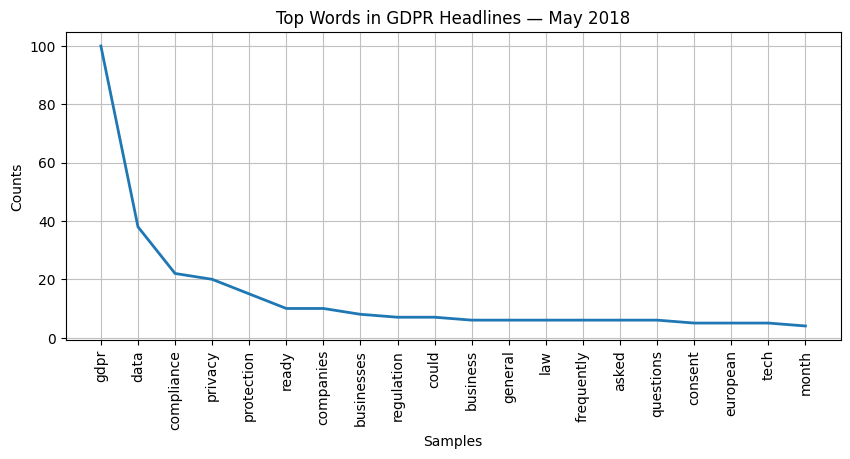

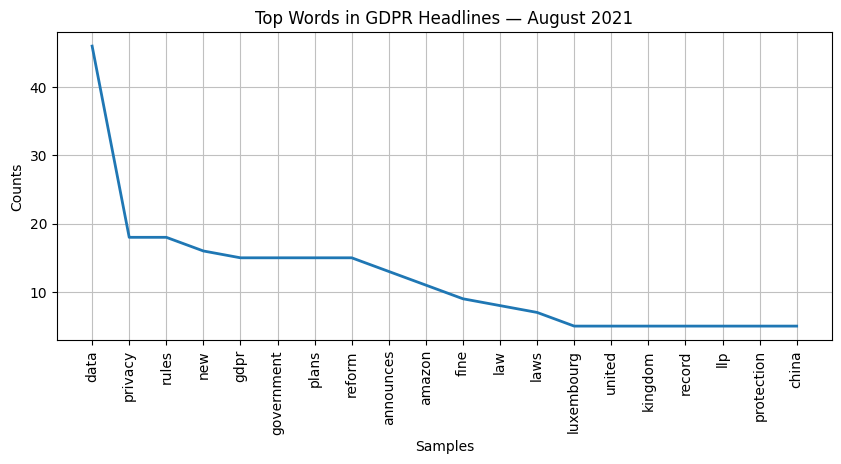

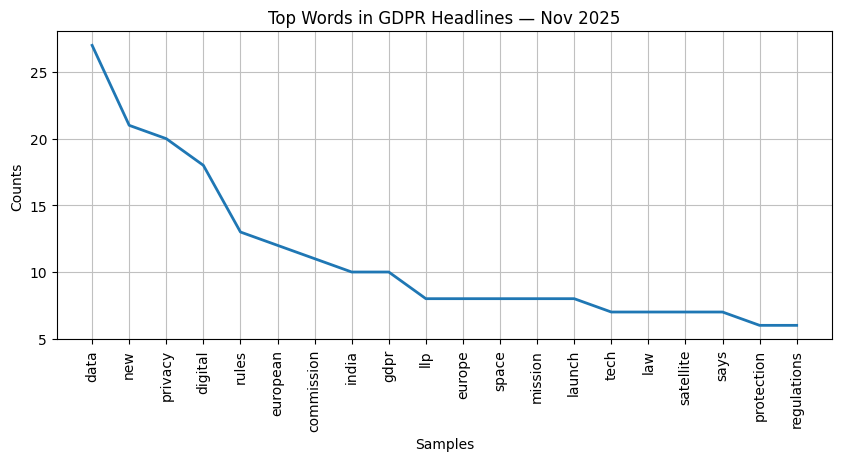

In [16]:
## plot Freqdist for each timeframe
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
fdist_2018.plot(20, title="Top Words in GDPR Headlines — May 2018")

plt.figure(figsize=(10,4))
fdist_2021.plot(20, title="Top Words in GDPR Headlines — August 2021")

plt.figure(figsize=(10,4))
fdist_2025.plot(20, title="Top Words in GDPR Headlines — Nov 2025")

plt.show()


**3.3 First paragraphs**

To explore these shifts further, I'll also conduct frequency distribution on the first paragraphs of each news article.

In [17]:
## tokenizing first paragraphs
df_may_2018["paragraph_tokens"]  = df_may_2018["first_paragraph"].fillna("").apply(clean_and_tokenize)
df_august_2021["paragraph_tokens"] = df_august_2021["first_paragraph"].fillna("").apply(clean_and_tokenize)
df_nov_2025["paragraph_tokens"]  = df_nov_2025["first_paragraph"].fillna("").apply(clean_and_tokenize)

## lists for each year
tokens_par_2018 = [t for toks in df_may_2018["paragraph_tokens"] for t in toks]
tokens_par_2021 = [t for toks in df_august_2021["paragraph_tokens"] for t in toks]
tokens_par_2025 = [t for toks in df_nov_2025["paragraph_tokens"] for t in toks]


In [18]:
fdist_par_2018 = FreqDist(tokens_par_2018)
fdist_par_2021 = FreqDist(tokens_par_2021)
fdist_par_2025 = FreqDist(tokens_par_2025)

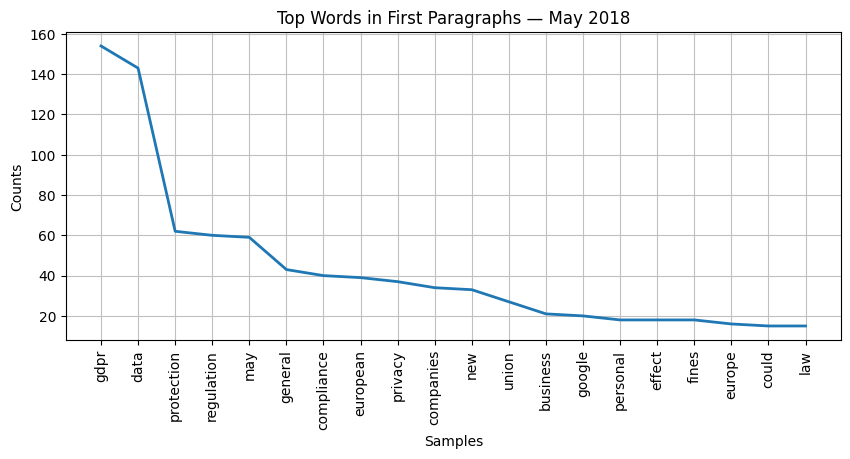

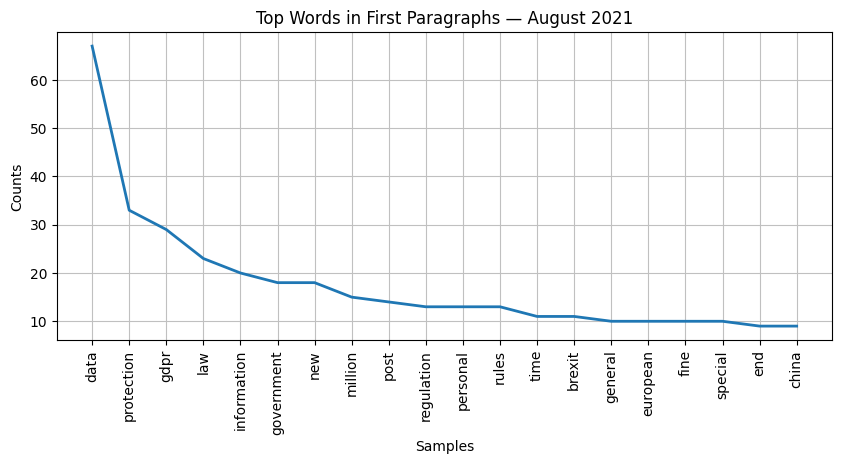

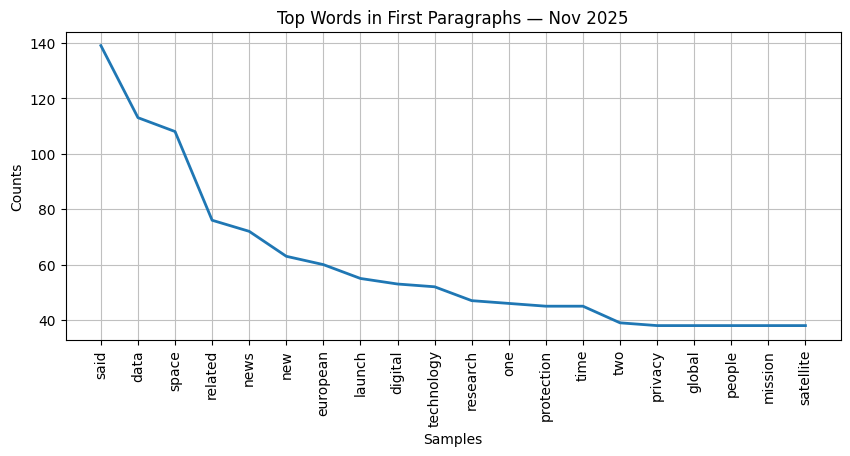

In [19]:
## plotting
plt.figure(figsize=(10,4))
fdist_par_2018.plot(20, title="Top Words in First Paragraphs — May 2018")

plt.figure(figsize=(10,4))
fdist_par_2021.plot(20, title="Top Words in First Paragraphs — August 2021")

plt.figure(figsize=(10,4))
fdist_par_2025.plot(20, title="Top Words in First Paragraphs — Nov 2025")

plt.show()

###**4. Discussion**



These findings reveal a clear evolution in media attention surrounding GDPR. In May 2018, coverage was dominated by news focused on preparation and uncertainty, using terms centered on readiness, implementation, and forward-looking questions. This aligns with the public's initial effort to understand the regulation's scope and implications.

By June 2021, the frequency distribution shifts. "Amazon" and "Luxembourg" emerge, which is consistent with the major news cycle surrounding Amazon's announcement that Luxembourg had imposed a 746 million euro fine for failing to properly notify authorities during a data breach. The rise of the word "fine" also appears tied to this event.

In the most recent distributions from November 2025, the vocabulary becomes more diffuse and technologically broad. General tech-related terms begin to appear with greater frequency, suggesting that GDPR compliance is now embedded in wider technology reporting rather than confined to policy-specific news. This shift may indicate that data protection concerns have become a routine element of tech industry coverage, reflecting regulatory normalization, a greater public expectation of privacy, and organizational awareness.


###**5. Conclusion**

Together, the topic modeling results show how media attention to the GDPR has shifted over the past seven years. Though all three time periods include expected but important words like "data", "protection", and "privacy", early coverage in 2018 emphasized preparedness as the public attempted to interpret the regulation's scope. 2021 headlines were shaped by high profile enforcement actions such as the Amazon fine. By today, the GDPR has become women into broader technology reporting, with coverage reflecting its impact in research and innovation.

Public narratives may shape the next phase of EU data protection policy. As negotiations over the Digital Omnibus package continue, understanding shifts in media framing is key for policymakers.

###**6. References**

1. Shead, S. (2021, July 30). Amazon hit with $887 million fine by European privacy watchdog. CNBC. https://www.cnbc.com/2021/07/30/amazon-hit-with-fine-by-eu-privacy-watchdog-.html

2. Tim Hickman, Dr. Detlev Gabel, Dr. Sylvia Lorenz, Clara Hainsdorf, and Daniel Mair. (2025, December 2). GDPR under revision: Key Takeaways from the Digital Omnibus Regulation Proposal. White & Case LLP. https://www.whitecase.com/insight-alert/gdpr-under-revision-key-takeaways-from-digital-omnibus-regulation-proposal

3. Wolford, B. (2025, August 19). What is GDPR, the EU’s new Data Protection Law? GDPR.eu. https://gdpr.eu/what-is-gdpr/#:~:text=The%20GDPR%20entered%20into%20force,were%20required%20to%20be%20compliant.